Trajetórias dos dois pêndulos no plano (x, y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [39]:
# Parâmetros do pêndulo duplo
g = 9.81  # Gravidade (m/s^2)
L1, L2 = 1.0, 1.0  # Comprimentos dos pêndulos (m)
m1, m2 = 1.5, 3.5  # Massas dos pêndulos (kg)

In [40]:
# Equações do pêndulo duplo (em termos de ângulos e velocidades angulares)
def double_pendulum(state, t, g, L1, L2, m1, m2):
    theta1, omega1, theta2, omega2 = state

    # Acelerações angulares (derivadas das equações de Lagrange)
    c = np.cos(theta1 - theta2)
    s = np.sin(theta1 - theta2)

    denom1 = (m1 + m2) * L1 - m2 * L1 * c**2
    denom2 = L2 * (m1 + m2) - m2 * L2 * c**2

    domega1 = (m2 * L2 * omega2**2 * s + m2 * g * np.sin(theta2) * c +
               m2 * L1 * omega1**2 * s * c - (m1 + m2) * g * np.sin(theta1)) / denom1

    domega2 = (-m2 * L2 * omega2**2 * s * c - (m1 + m2) * g * np.sin(theta2) +
               (m1 + m2) * L1 * omega1**2 * s - (m1 + m2) * g * np.sin(theta1) * c) / denom2

    return [omega1, domega1, omega2, domega2]

In [41]:
# Tempo
t = np.linspace(0, 30, 1000)

In [42]:
# Condições iniciais: ângulos (rad) e velocidades angulares iniciais
initial_state = [np.pi / 2, 0, np.pi / 4, 0]  # theta1, omega1, theta2, omega2

In [43]:
# Resolver o sistema
solution = odeint(double_pendulum, initial_state, t, args=(g, L1, L2, m1, m2))
theta1, omega1, theta2, omega2 = solution.T


<ipython-input-43-3c3f409512c5>:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(double_pendulum, initial_state, t, args=(g, L1, L2, m1, m2))


In [44]:
# Converter ângulos para coordenadas (x, y)
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

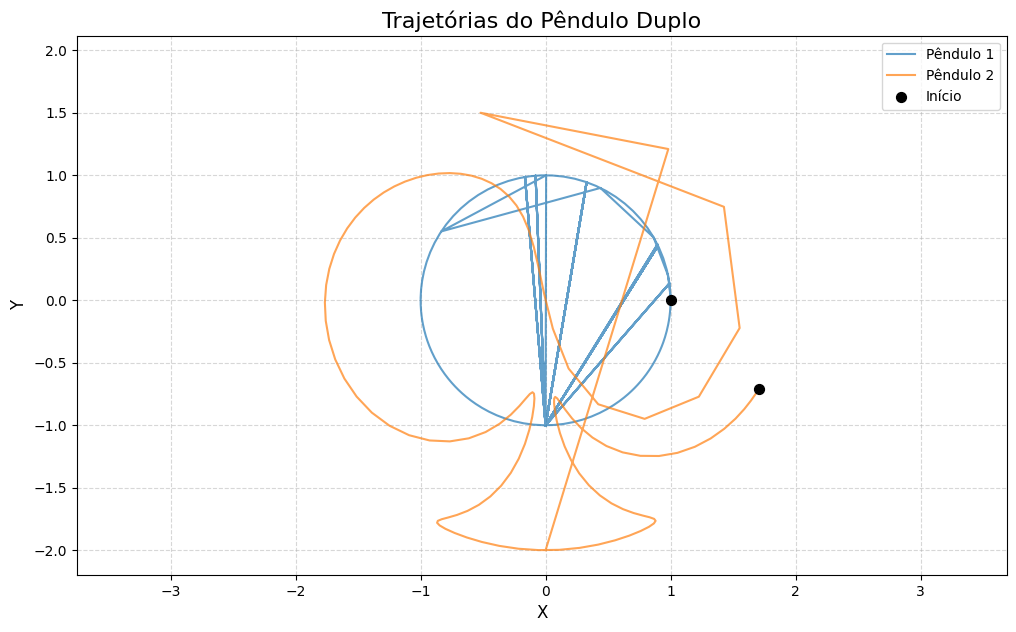

In [45]:
# Plotar as trajetórias
plt.figure(figsize=(12, 7))
plt.plot(x1, y1, label="Pêndulo 1", alpha=0.7)
plt.plot(x2, y2, label="Pêndulo 2", alpha=0.7)
plt.scatter([x1[0], x2[0]], [y1[0], y2[0]], color='black', s=50, zorder=5, label="Início")
plt.title("Trajetórias do Pêndulo Duplo", fontsize=16)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')  # Para manter proporções reais
plt.show()

Segundo Exemplo

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

In [47]:
# Parâmetros do pêndulo duplo
g = 9.81  # Gravidade (m/s^2)
L1, L2 = 1.0, 1.0  # Comprimentos dos pêndulos (m)
m1, m2 = 1.5, 3.5  # Massas dos pêndulos (kg)

In [48]:
# Equações do pêndulo duplo (em termos de ângulos e velocidades angulares)
def double_pendulum(state, t, g, L1, L2, m1, m2):
    theta1, omega1, theta2, omega2 = state

    # Acelerações angulares (derivadas das equações de Lagrange)
    c = np.cos(theta1 - theta2)
    s = np.sin(theta1 - theta2)

    denom1 = (m1 + m2) * L1 - m2 * L1 * c**2
    denom2 = L2 * (m1 + m2) - m2 * L2 * c**2

    domega1 = (m2 * L2 * omega2**2 * s + m2 * g * np.sin(theta2) * c +
               m2 * L1 * omega1**2 * s * c - (m1 + m2) * g * np.sin(theta1)) / denom1

    domega2 = (-m2 * L2 * omega2**2 * s * c - (m1 + m2) * g * np.sin(theta2) +
               (m1 + m2) * L1 * omega1**2 * s - (m1 + m2) * g * np.sin(theta1) * c) / denom2

    return [omega1, domega1, omega2, domega2]

In [49]:
g, L1, L2, m1, m2 = 9.81, 1.0, 1.0, 1.0, 1.0
t = np.linspace(0, 20, 1000)
initial_state = [np.pi / 2, 0, np.pi / 4, 0]
solution = odeint(double_pendulum, initial_state, t, args=(g, L1, L2, m1, m2))
theta1, omega1, theta2, omega2 = solution.T

<ipython-input-49-7ee442888f9c>:4: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(double_pendulum, initial_state, t, args=(g, L1, L2, m1, m2))


In [50]:
# Coordenadas
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

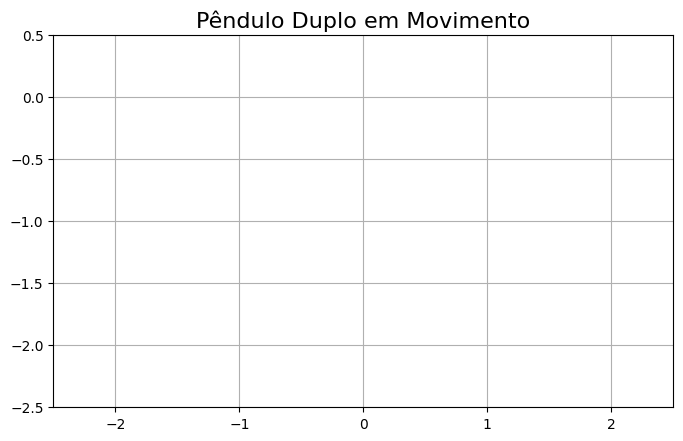

In [52]:
# Configurar a figura
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 0.5)
ax.set_aspect('equal')
ax.grid(True)

# Elementos da animação
line, = ax.plot([], [], 'o-', lw=2, markersize=10)
trace, = ax.plot([], [], 'r-', alpha=0.5)  # Traço do segundo pêndulo
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Inicialização
def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

# Atualização da animação
def update(frame):
    # Posições dos pêndulos
    x = [0, x1[frame], x2[frame]]
    y = [0, y1[frame], y2[frame]]
    line.set_data(x, y)
    # Traço do segundo pêndulo
    trace.set_data(x2[:frame], y2[:frame])
    # Tempo
    time_text.set_text(f'Tempo: {t[frame]:.2f} s')
    return line, trace, time_text

# Criar animação
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=20)

plt.title("Pêndulo Duplo em Movimento", fontsize=16)
plt.show()